In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from cigma import util, plot

In [2]:
# genomic feature
## par 
out_f = '../../analysis/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/he.free.jk.npy'
ctp_f = '../../analysis/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ctp.final.gz'
eds_f = '../../analysis/yazar/eds.txt'

## load data
out = np.load(out_f, allow_pickle=True).item()
eds = pd.read_table(eds_f)
print(eds.shape, eds['combined_connected_rank'].isna().sum())

## collect data
gene_feature = {'gene': out['gene'], 'shared_h2': out['free']['shared_h2'], 'ct_h2': out['free']['specific_h2'],
        'hom_g2': out['free']['hom_g2'], 'V': np.diagonal(out['free']['V'], axis1=1, axis2=2).mean(axis=1), 
        'var_beta': out['free']['ct_beta'].var(axis=1), 
        'std_specificity': np.sqrt(out['p']['free']['var_specificity'])
        }

gf = pd.DataFrame(gene_feature)

gf['g'] = gf['V'] + gf['hom_g2']
gf['specificity'] = gf['V'] / gf['g']
gf['std_beta'] = np.sqrt(gf['var_beta'])

## merge with eds
print(gf.shape)
gf = gf.merge(eds, left_on='gene', right_on='gene_id')
print(gf.shape, gf['gene'].nunique(), gf[['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']].dropna(how='all').shape, (~gf['LOEUF'].isna()).sum(), (~gf['ActivityLinking_EnhancerNumber'].isna()).sum(), (~gf['combined_connected_rank'].isna()).sum())
gf['gene_length (kb)'] = gf['gene_length'] / 1e3


(20125, 16) 10710
(10288, 10)
(10037, 26) 10037 (10035, 3) 9970 10017 5523


In [3]:
# LDSC
## data
neg_traits = ['Height', 'CAD', 'SCZ']
pos_traits = ['UC', 'RA', 'PBC', 'MS', 'Crohns', 'Celiac', 'Lupus']
traits = neg_traits + pos_traits

ldscs = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_200/window_500000/he.{gwas}.cell_type_results.txt'
                    for gwas in traits] 

ldsc_data = []
for stacked_f, trait in zip(ldscs, traits):
    tmp = pd.read_table(stacked_f)
    if trait == 'Lupus':
        trait = 'SLE'
    tmp['trait'] = trait
    ldsc_data.append(tmp)

ldsc_data = pd.concat(ldsc_data, ignore_index=True)
index = traits.index('Lupus')
traits[index] = 'SLE'

(7043, 27) (7042, 3) 6996 7028 3828
1.9146197113857708
TtestResult(statistic=np.float64(6.546246535411452), pvalue=np.float64(6.683172692068267e-11), df=np.float64(3826.0))
LOEUF
Mega regression of hom_g2:
 const    0.017303
LOEUF    0.027761
dtype: float64 
 const    1.258072e-11
LOEUF    3.754301e-26
dtype: float64
Mega regression of V:
 const    0.016002
LOEUF    0.016519
dtype: float64 
 const    0.000005
LOEUF    0.000005
dtype: float64
Mega regression of specificity:
 const    1.799741
LOEUF   -1.398515
dtype: float64 
 const    0.227363
LOEUF    0.360035
dtype: float64
Mega regression of specificity rank:
 const    3736.840937
LOEUF    -281.506232
dtype: float64 
 const    0.000000e+00
LOEUF    1.518139e-08
dtype: float64


[2025-03-15 00:54:33 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:33 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:33 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:33 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:34 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

ActivityLinking_EnhancerNumber
Mega regression of hom_g2:
 const                             0.043114
ActivityLinking_EnhancerNumber   -0.000122
dtype: float64 
 const                             1.757627e-106
ActivityLinking_EnhancerNumber     1.516531e-01
dtype: float64
Mega regression of V:
 const                             0.019624
ActivityLinking_EnhancerNumber    0.000603
dtype: float64 
 const                             9.398064e-14
ActivityLinking_EnhancerNumber    1.774408e-07
dtype: float64
Mega regression of specificity:
 const                             0.949858
ActivityLinking_EnhancerNumber   -0.019735
dtype: float64 
 const                             0.394288
ActivityLinking_EnhancerNumber    0.686895
dtype: float64
Mega regression of specificity rank:
 const                             3375.907401
ActivityLinking_EnhancerNumber       8.115351
dtype: float64 
 const                             0.000000e+00
ActivityLinking_EnhancerNumber    4.287342e-07
dtype: float64

[2025-03-15 00:54:34 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:34 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:35 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:35 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:35 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

combined_connected_rank
Mega regression of hom_g2:
 const                      0.023714
combined_connected_rank    0.000005
dtype: float64 
 const                      3.146477e-20
combined_connected_rank    1.904947e-05
dtype: float64
Mega regression of V:
 const                      0.036816
combined_connected_rank   -0.000003
dtype: float64 
 const                      1.101953e-19
combined_connected_rank    1.437360e-01
dtype: float64
Mega regression of specificity:
 const                     -0.034664
combined_connected_rank    0.000553
dtype: float64 
 const                      0.989780
combined_connected_rank    0.651392
dtype: float64
Mega regression of specificity rank:
 const                      1935.376263
combined_connected_rank      -0.010904
dtype: float64 
 const                      0.000000
combined_connected_rank    0.500021
dtype: float64


[2025-03-15 00:54:35 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:35 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


      Name   Coefficient  Coefficient_std_error  Coefficient_P_value   trait
0   shared  4.266588e-09           9.209898e-09             0.321589  Height
1      var  2.539260e-09           9.263084e-09             0.391994  Height
2     gcta -2.659591e-09           5.764795e-09             0.677726  Height
3     mean -1.126715e-08           6.078901e-09             0.968094  Height
4   shared  4.491146e-09           4.678503e-09             0.168539     CAD
5      var  4.405140e-09           4.602517e-09             0.169255     CAD
6     gcta  4.217472e-09           4.539642e-09             0.176436     CAD
7     mean  1.641685e-09           4.748672e-09             0.364779     CAD
8     gcta -2.949876e-09           7.053814e-09             0.662098     SCZ
9      var -4.844143e-09           7.151166e-09             0.750921     SCZ
10  shared -1.100802e-08           8.527299e-09             0.901633     SCZ
11    mean -1.005700e-08           7.570243e-09             0.907992     SCZ

/tmp/ipykernel_20942/3701870038.py:205: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


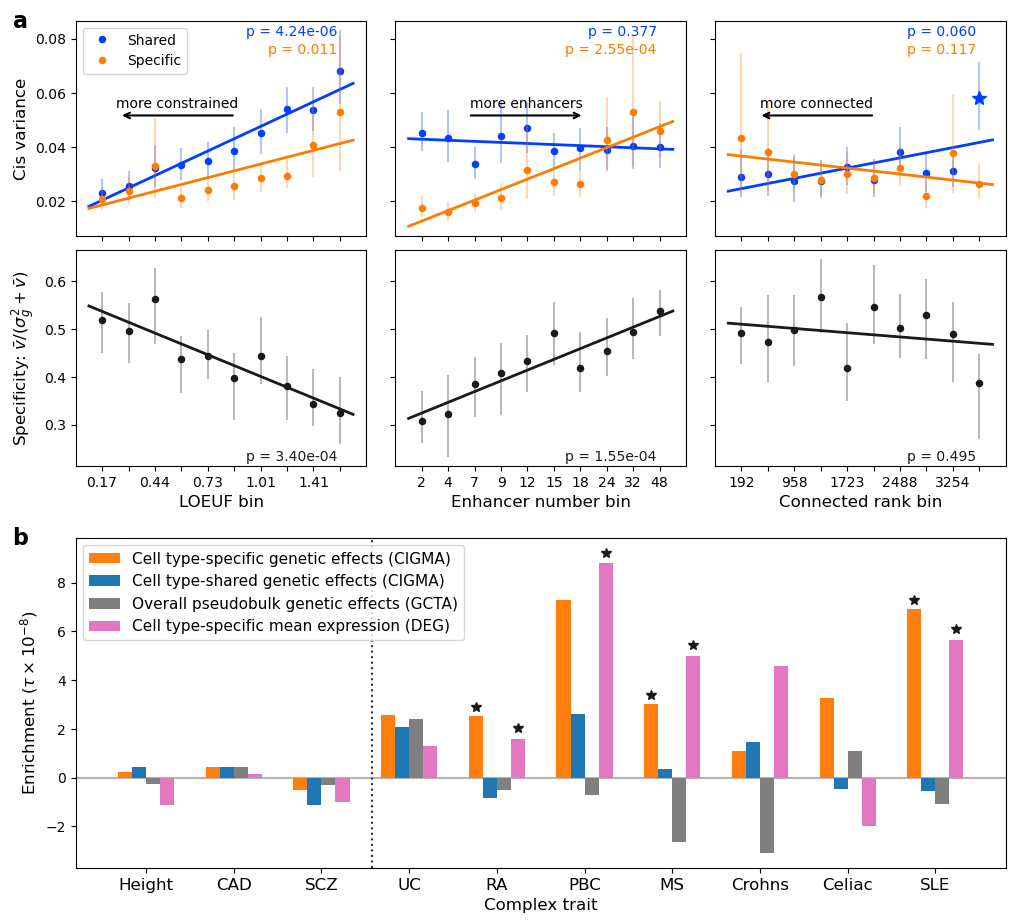

In [4]:
# Fig 4
fs = 12
lw = 2
alpha = 0.3
format_p = lambda p: f'{p:.2e}' if p < 0.01 else f'{p:.3f}'

# sns.set_style('dark')

colors = sns.color_palette('bright')
fig = plt.figure(1, figsize=(12, 11))
gs = gridspec.GridSpec(30, 3, wspace=0.1, hspace=1)

# genomic feature
data = gf.copy()
data = data.loc[data['g'] > 0]  # NOTE: removed negative gen variance
print(data.shape, data[['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']].dropna(how='all').shape, (~data['LOEUF'].isna()).sum(), (~data['ActivityLinking_EnhancerNumber'].isna()).sum(), (~data['combined_connected_rank'].isna()).sum())
# rerank connectness
data['combined_connected_rank'] = data['combined_connected_rank'].rank(method='first')

# divide gene annotation into bins
annotations = ['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']
for annotation in annotations:
    data = plot.bin_gene_annotation(data, annotation, 10)

# t test for combined connectivity
connectivity_data = data[['hom_g2', 'combined_connected_rank', 'combined_connected_rank_bin']].dropna()
least_connected_bin = connectivity_data['combined_connected_rank_bin'].max()
least_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] == least_connected_bin]
other_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] != least_connected_bin]
print(least_connected['hom_g2'].mean() / other_connected['hom_g2'].mean())
print(stats.ttest_ind(least_connected['hom_g2'], other_connected['hom_g2']))


ax11 = fig.add_subplot(gs[:8, 0])
ax12 = fig.add_subplot(gs[:8, 1], sharey=ax11)
ax13 = fig.add_subplot(gs[:8, 2], sharey=ax11)
ax21 = fig.add_subplot(gs[8:16, 0], sharex=ax11)
ax22 = fig.add_subplot(gs[8:16, 1], sharex=ax12, sharey=ax21)
ax23 = fig.add_subplot(gs[8:16, 2], sharex=ax13, sharey=ax21)
axes = np.array([[ax11, ax12, ax13],
                [ax21, ax22, ax23]])


for j, annotation in enumerate(annotations):
    print(annotation)
    # mega regression
    annotation_data = data[['hom_g2', 'V', 'specificity', annotation]].dropna()
    X = sm.add_constant(annotation_data[annotation])
    for y in ['hom_g2', 'V', 'specificity']:
        model = sm.OLS(annotation_data[y], X).fit()
        print(f'Mega regression of {y}:\n', model.params, '\n', model.pvalues)
        # print(model.summary())
    model = sm.OLS(annotation_data['specificity'].rank(), X).fit()
    print(f'Mega regression of specificity rank:\n', model.params, '\n', model.pvalues)

    # meta-regression
    grouped = data.groupby(annotation + '_bin', observed=True)

    line1, p1, slope1, intercept1 = plot.meta_regression(grouped, 'hom_g2', 'mean', return_params=True)
    line2, p2, slope2, intercept2 = plot.meta_regression(grouped, 'V', 'mean', return_params=True)

    ax = axes[0, j]
    # point plot
    sns.pointplot(data=data, x=annotation + '_bin', y='hom_g2', estimator='mean',
                markers='.', linestyles='none', color=colors[0], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Shared', ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope1 * xs + intercept1, color=colors[0], lw=lw, linestyle='-')
    sns.pointplot(data=data, x=annotation + '_bin', y='V', estimator='mean',
                markers='.', linestyles='none', color=colors[1], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Specific', ax=ax)
    ax.plot(xs, slope2 * xs + intercept2, color=colors[1], lw=lw, linestyle='-')
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelbottom=False)

    # add p values
    x = 0.9
    y = 0.98
    ax.text(x, y, f'p = {format_p(p1)}', fontsize=fs-2, color=colors[0], ha='right', va='top', transform=ax.transAxes)
    y -= .08
    ax.text(x, y, f'p = {format_p(p2)}', fontsize=fs-2, color=colors[1], ha='right', va='top', transform=ax.transAxes)


    ax2 = axes[1, j]
    line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'median', return_params=True)

    # pointplot
    sns.pointplot(data=data, x=annotation + '_bin', y='specificity', err_kws={'alpha': alpha, 'linewidth': 1.5},
                    markers='.', estimator='median', linestyles='none', color='0.1', ax=ax2)
    xs = np.array(ax2.get_xlim())
    ax2.plot(xs, slope * xs + intercept, color='0.1', lw=lw, linestyle='-')

    ax2.text(x, 0.01, f'p = {format_p(p)}', fontsize=fs-2, color='0.1', ha='right', va='bottom', transform=ax2.transAxes)

    xlabel = re.sub('_', ' ', annotation + '_bin')
    if annotation == 'ActivityLinking_EnhancerNumber':
        xlabel = 'Enhancer number bin'
    elif annotation == 'combined_connected_rank':
        xlabel = 'Connected rank bin'

    if annotation in ['LOEUF', 'EDS', 'combined_connected_rank']:
        # set x tick labels
        xticklabels = []
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % 2 == 0:
                xticklabels.append(label.get_text())
            else:
                xticklabels.append('')
        ax2.set_xticks(ax.get_xticks())
        ax2.set_xticklabels(xticklabels)

    ax2.set_xlabel(xlabel, fontsize=fs)

    if j == 0:
        ax.set_ylabel('Cis variance', fontsize=fs)
        ax2.set_ylabel('Specificity: ' + r'$\bar{v}/(\sigma_g^2 + \bar{v})$', fontsize=fs)
    else:
        ax.tick_params(axis='y', labelleft=False)
        ax2.tick_params(axis='y', labelleft=False)
        ax.set_ylabel('')
        ax2.set_ylabel('')
    
    if j != 0:
        ax.legend().set_visible(False)
    else:
        ax.legend(loc='upper left', fontsize=fs-2)

# add arrow
arrow_position = (0.55, 0.56)
axes[0, 0].annotate('', xy=(arrow_position[0] - 0.40, arrow_position[1]), xytext=arrow_position,
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=10, ha='center', va='center', xycoords=axes[0, 0].transAxes)
axes[0, 0].text(0.35, 0.58, 'more constrained', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 0].transAxes)

axes[0, 2].annotate('', xy=(arrow_position[0] - 0.40, arrow_position[1]), xytext=arrow_position,
        arrowprops=dict(arrowstyle='->', lw=1.5),
        fontsize=10, ha='center', va='center', xycoords=axes[0, 2].transAxes)
axes[0, 2].text(0.35, 0.58, 'more connected', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 2].transAxes)

axes[0, 1].annotate('', xy=(arrow_position[0] + 0.1, arrow_position[1]), xytext=(arrow_position[0] - 0.40 + 0.1, arrow_position[1]),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=10, ha='center', va='center', xycoords=axes[0, 1].transAxes)
axes[0, 1].text(0.45, 0.58, 'more enhancers', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 1].transAxes)


# add a star to connectedness vs shared
# print(data.head())
# print(axes[0, 2].get_xlim())
axes[0, 2].plot(9, data.loc[data['combined_connected_rank_bin'] == data['combined_connected_rank_bin'].max(), 'hom_g2'].mean(), marker='*', color=colors[0], markersize=10, zorder=10)


## LDSC
# ax = fig.add_subplot(gs[18:, 0])
ax = fig.add_subplot(gs[18:, :])
gene_set_order = ['var', 'shared', 'gcta', 'mean' ]

x = np.arange(ldsc_data['trait'].nunique())
width = 0.16
# width = 0.32
colors = [sns.color_palette()[1], sns.color_palette()[0], sns.color_palette()[7], sns.color_palette()[6]]
# colors = [sns.color_palette()[2], sns.color_palette()[1]] + sns.color_palette()[3:]
multiplier = -len(gene_set_order) / 2 + 0.5
print(ldsc_data)

for i, gene_set in enumerate(gene_set_order):
    if gene_set == 'mean':
        label = 'Cell type-specific mean expression (DEG)'
    elif gene_set == 'var':
        label = 'Cell type-specific genetic effects (CIGMA)'
    elif gene_set =='shared':
        label = 'Cell type-shared genetic effects (CIGMA)'
    elif gene_set == 'gcta':
        label = 'Overall pseudobulk genetic effects (GCTA)'
    offset = width * multiplier
    set_data = ldsc_data.loc[ldsc_data['Name'] == gene_set]
    set_data = set_data.set_index('trait')
    # ys = np.log10(set_data['Coefficient_P_value'][traits]) * (-1)
    ys = set_data['Coefficient'][traits] * 1e8
    rects = ax.bar(x + offset, ys, width, yerr=None, label=label, color=colors[i])
    # add star
    for p, rect in zip(set_data['Coefficient_P_value'][traits], rects):
        if p < 0.05:
            ax.plot(rect.get_x() + rect.get_width() / 2, rect.get_height() + ys.max() * .05, '*', 
                    color='0.1', markersize=7)

    multiplier += 1
ax.set_ylabel(r'Enrichment ($\tau \times 10^{-8}$)', fontsize=fs)
# ax.set_ylabel(r'Regression coefficient, $\tau$ ($\times 10^{-8}$)', fontsize=fs)
ax.set_xlabel('Complex trait', fontsize=fs)

ax.set_xticks(x, traits, fontsize=fs)
ax.legend(loc='upper left', fontsize=fs-1)
ax.axvline(len(neg_traits) - 0.5 + width / 2, linestyle=':', color='0.2')
ax.axhline(0, linestyle='-', color='0.7', zorder=0)
# ax.axhline(-np.log10(0.05), linestyle=(0, (6, 6)), color='0.7', zorder=0)

fig.text(0.085, .89, 'a', fontsize=fs + 4, fontweight='bold', va='top', ha='right')
fig.text(0.085, .42, 'b', fontsize=fs + 4, fontweight='bold', va='top', ha='right')


fig.tight_layout()

[2025-03-15 00:54:36 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:36 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


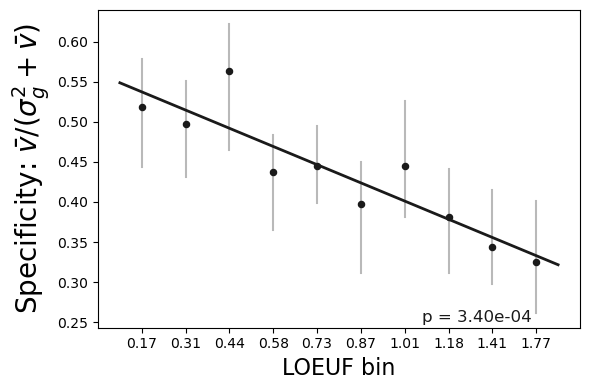

In [5]:
# Fig1 specificity vs loeuf
annotation = 'LOEUF'
grouped = data.groupby(annotation + '_bin', observed=True)

fig, ax = plt.subplots(figsize=(6, 4))

line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'median', return_params=True)

# pointplot
sns.pointplot(data=data, x=annotation + '_bin', y='specificity', err_kws={'alpha': alpha, 'linewidth': 1.5},
                markers='.', estimator='median', linestyles='none', color='0.1', ax=ax)
xs = np.array(ax.get_xlim())
ax.plot(xs, slope * xs + intercept, color='0.1', lw=lw, linestyle='-')

ax.text(0.9, 0.01, f'p = {format_p(p)}', fontsize=fs, color='0.1', ha='right', va='bottom', transform=ax.transAxes)

ax.set_xlabel('LOEUF bin', fontsize=fs + 4)
ax.set_ylabel('Specificity: ' + r'$\bar{v}/(\sigma_g^2 + \bar{v})$', fontsize=fs + 8)

fig.tight_layout()

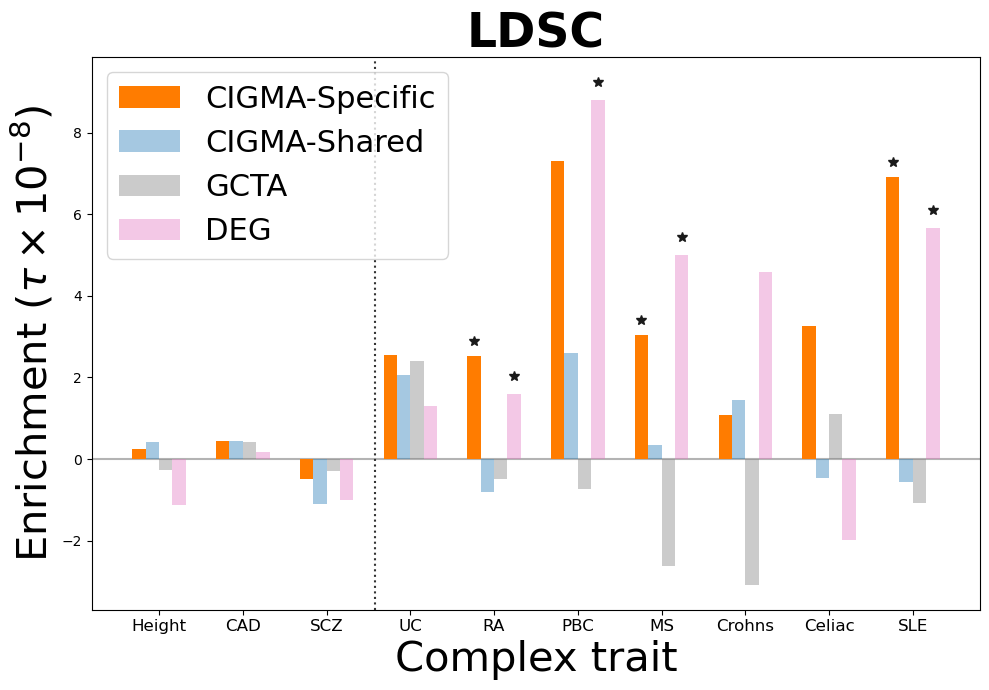

In [6]:
# Fig 1 LDSC
from matplotlib.colors import to_rgba

gene_set_order = ['var', 'shared', 'gcta', 'mean' ]

x = np.arange(ldsc_data['trait'].nunique())
width = 0.16
colors = [sns.color_palette('bright')[1], to_rgba(sns.color_palette()[0], alpha=.4), to_rgba(sns.color_palette()[7], alpha=.4), to_rgba(sns.color_palette()[6], alpha=.4)]
multiplier = -len(gene_set_order) / 2 + 0.5

fig, ax = plt.subplots(figsize=(10, 7))
for i, gene_set in enumerate(gene_set_order):
    if gene_set == 'mean':
        label = 'DEG'
    elif gene_set == 'var':
        label = 'CIGMA-Specific'
    elif gene_set =='shared':
        label = 'CIGMA-Shared'
    elif gene_set == 'gcta':
        label = 'GCTA'
    offset = width * multiplier
    set_data = ldsc_data.loc[ldsc_data['Name'] == gene_set]
    set_data = set_data.set_index('trait')
    # ys = np.log10(set_data['Coefficient_P_value'][traits]) * (-1)
    ys = set_data['Coefficient'][traits] * 1e8
    rects = ax.bar(x + offset, ys, width, yerr=None, label=label, color=colors[i])

    # add star
    for p, rect in zip(set_data['Coefficient_P_value'][traits], rects):
        if p < 0.05:
            ax.plot(rect.get_x() + rect.get_width() / 2, rect.get_height() + ys.max() * .05, '*', 
                    color='0.1', markersize=7)

    multiplier += 1
# ax.set_ylabel('$-log_{10}(p)$ for enrichment', fontsize=fs + 18)
ax.set_ylabel(r'Enrichment ($\tau \times 10^{-8}$)', fontsize=fs+18)
ax.set_xlabel('Complex trait', fontsize=fs + 18)
ax.set_title('LDSC', fontsize=fs + 22, fontweight='bold')

ax.set_xticks(x, traits, fontsize=fs)
ax.legend(loc='upper left', fontsize=fs + 10)
ax.axvline(len(neg_traits) - 0.5 + width / 2, linestyle=':', color='0.2')
# ax.axhline(-np.log10(0.05), linestyle=(0, (6, 6)), color='0.7', zorder=0)
ax.axhline(0, linestyle='-', color='0.7', zorder=0)

fig.tight_layout()

# Supp adjust for mean genes

In [7]:
# LDSC
## data
neg_traits = ['Height', 'CAD', 'SCZ']
pos_traits = ['UC', 'RA', 'PBC', 'MS', 'Crohns', 'Celiac', 'Lupus']
traits = neg_traits + pos_traits

demeaned_ldscs = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_200/window_500000/he.{gwas}.controlmean.cell_type_results.txt'
                    for gwas in traits] 

demeaned_ldsc_data = []
for stacked_f, trait in zip(demeaned_ldscs, traits):
    tmp = pd.read_table(stacked_f)
    if trait == 'Lupus':
        trait = 'SLE'
    tmp['trait'] = trait
    demeaned_ldsc_data.append(tmp)

demeaned_ldsc_data = pd.concat(demeaned_ldsc_data, ignore_index=True)
index = traits.index('Lupus')
traits[index] = 'SLE'


[2025-03-15 00:54:37 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:37 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


(7043, 27) (7042, 3) 6996 7028 3828
(3828, 3)
Mega regression:
 const                      2.704437e-11
combined_connected_rank    2.813007e-05
dtype: float64
-1.6132087878701145
TtestResult(statistic=np.float64(6.498648728975455), pvalue=np.float64(9.148060092526098e-11), df=np.float64(3826.0))
LOEUF


[2025-03-15 00:54:37 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:37 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:37 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:37 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:38 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

ActivityLinking_EnhancerNumber


[2025-03-15 00:54:38 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:38 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:38 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:38 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


combined_connected_rank


[2025-03-15 00:54:38 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:38 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:39 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:39 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_20942/3786561555.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so

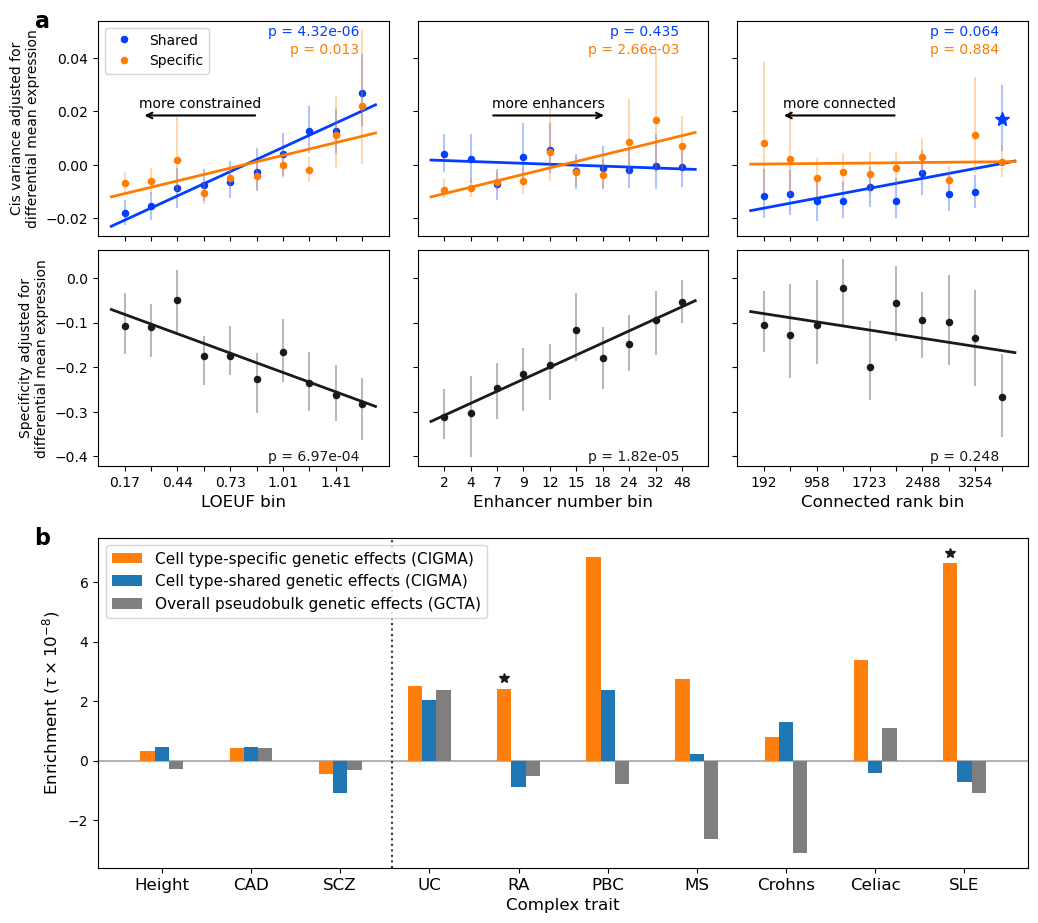

In [8]:
fs = 12
lw = 2
alpha = 0.3
format_p = lambda p: f'{p:.2e}' if p < 0.01 else f'{p:.3f}'

colors = sns.color_palette('bright')
fig = plt.figure(1, figsize=(12, 11))
gs = gridspec.GridSpec(30, 3, wspace=0.1, hspace=1)

# genomic feature
data = gf.copy()
data = data.loc[data['g'] > 0]  # NOTE: removed negative gen variance
print(data.shape, data[['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']].dropna(how='all').shape, (~data['LOEUF'].isna()).sum(), (~data['ActivityLinking_EnhancerNumber'].isna()).sum(), (~data['combined_connected_rank'].isna()).sum())
# rerank connectness
data['combined_connected_rank'] = data['combined_connected_rank'].rank(method='first')

# adjust DEG
ys = ['hom_g2', 'V', 'specificity']
for y in ys:
    X = sm.add_constant(data['var_beta'])
    model = sm.OLS(data[y], X).fit()
    data[y] = model.resid

# divide gene annotation into bins
annotations = ['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']
for annotation in annotations:
    data = plot.bin_gene_annotation(data, annotation, 10)

# mega regression for combined connectivity
connectivity_data = data[['hom_g2', 'combined_connected_rank', 'combined_connected_rank_bin']].dropna()
print(connectivity_data.shape)
X = sm.add_constant(connectivity_data['combined_connected_rank'])
model = sm.OLS(connectivity_data['hom_g2'], X).fit()
# print(model.summary())
print('Mega regression:\n', model.pvalues)


# t test
least_connected_bin = connectivity_data['combined_connected_rank_bin'].max()
least_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] == least_connected_bin]
other_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] != least_connected_bin]
print(least_connected['hom_g2'].mean() / other_connected['hom_g2'].mean())
print(stats.ttest_ind(least_connected['hom_g2'], other_connected['hom_g2']))


ax11 = fig.add_subplot(gs[:8, 0])
ax12 = fig.add_subplot(gs[:8, 1], sharey=ax11)
ax13 = fig.add_subplot(gs[:8, 2], sharey=ax11)
ax21 = fig.add_subplot(gs[8:16, 0], sharex=ax11)
ax22 = fig.add_subplot(gs[8:16, 1], sharex=ax12, sharey=ax21)
ax23 = fig.add_subplot(gs[8:16, 2], sharex=ax13, sharey=ax21)
axes = np.array([[ax11, ax12, ax13],
                [ax21, ax22, ax23]])


for j, annotation in enumerate(annotations):
    print(annotation)
    grouped = data.groupby(annotation + '_bin', observed=True)

    line1, p1, slope1, intercept1 = plot.meta_regression(grouped, 'hom_g2', 'mean', return_params=True)
    line2, p2, slope2, intercept2 = plot.meta_regression(grouped, 'V', 'mean', return_params=True)

    ax = axes[0, j]
    # point plot
    sns.pointplot(data=data, x=annotation + '_bin', y='hom_g2', estimator='mean',
                markers='.', linestyles='none', color=colors[0], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Shared', ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope1 * xs + intercept1, color=colors[0], lw=lw, linestyle='-')
    sns.pointplot(data=data, x=annotation + '_bin', y='V', estimator='mean',
                markers='.', linestyles='none', color=colors[1], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Specific', ax=ax)
    ax.plot(xs, slope2 * xs + intercept2, color=colors[1], lw=lw, linestyle='-')
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelbottom=False)

    # add p values
    x = 0.9
    y = 0.98
    ax.text(x, y, f'p = {format_p(p1)}', fontsize=fs-2, color=colors[0], ha='right', va='top', transform=ax.transAxes)
    y -= .08
    ax.text(x, y, f'p = {format_p(p2)}', fontsize=fs-2, color=colors[1], ha='right', va='top', transform=ax.transAxes)


    ax2 = axes[1, j]
    line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'median', return_params=True)

    # pointplot
    sns.pointplot(data=data, x=annotation + '_bin', y='specificity', err_kws={'alpha': alpha, 'linewidth': 1.5},
                    markers='.', estimator='median', linestyles='none', color='0.1', ax=ax2)
    xs = np.array(ax2.get_xlim())
    ax2.plot(xs, slope * xs + intercept, color='0.1', lw=lw, linestyle='-')

    ax2.text(x, 0.01, f'p = {format_p(p)}', fontsize=fs-2, color='0.1', ha='right', va='bottom', transform=ax2.transAxes)

    xlabel = re.sub('_', ' ', annotation + '_bin')
    if annotation == 'ActivityLinking_EnhancerNumber':
        xlabel = 'Enhancer number bin'
    elif annotation == 'combined_connected_rank':
        xlabel = 'Connected rank bin'

    if annotation in ['LOEUF', 'EDS', 'combined_connected_rank']:
        # set x tick labels
        xticklabels = []
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % 2 == 0:
                xticklabels.append(label.get_text())
            else:
                xticklabels.append('')
        ax2.set_xticks(ax.get_xticks())
        ax2.set_xticklabels(xticklabels)

    ax2.set_xlabel(xlabel, fontsize=fs)

    if j == 0:
        ax.set_ylabel('Cis variance adjusted for\ndifferential mean expression', fontsize=fs-2)
        ax2.set_ylabel('Specificity adjusted for\ndifferential mean expression', fontsize=fs-2)
    else:
        ax.tick_params(axis='y', labelleft=False)
        ax2.tick_params(axis='y', labelleft=False)
        ax.set_ylabel('')
        ax2.set_ylabel('')
    
    if j != 0:
        ax.legend().set_visible(False)
    else:
        ax.legend(loc='upper left', fontsize=fs-2)

# add arrow
arrow_position = (0.55, 0.56)
axes[0, 0].annotate('', xy=(arrow_position[0] - 0.40, arrow_position[1]), xytext=arrow_position,
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=10, ha='center', va='center', xycoords=axes[0, 0].transAxes)
axes[0, 0].text(0.35, 0.58, 'more constrained', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 0].transAxes)

axes[0, 2].annotate('', xy=(arrow_position[0] - 0.40, arrow_position[1]), xytext=arrow_position,
        arrowprops=dict(arrowstyle='->', lw=1.5),
        fontsize=10, ha='center', va='center', xycoords=axes[0, 2].transAxes)
axes[0, 2].text(0.35, 0.58, 'more connected', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 2].transAxes)

axes[0, 1].annotate('', xy=(arrow_position[0] + 0.1, arrow_position[1]), xytext=(arrow_position[0] - 0.40 + 0.1, arrow_position[1]),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=10, ha='center', va='center', xycoords=axes[0, 1].transAxes)
axes[0, 1].text(0.45, 0.58, 'more enhancers', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 1].transAxes)


# add a star to connectedness vs shared
# print(data.head())
# print(axes[0, 2].get_xlim())
axes[0, 2].plot(9, data.loc[data['combined_connected_rank_bin'] == data['combined_connected_rank_bin'].max(), 'hom_g2'].mean(), marker='*', color=colors[0], markersize=10, zorder=10)


## LDSC
# ax = fig.add_subplot(gs[18:, 0])
ax = fig.add_subplot(gs[18:, :])
demeaned_gene_set_order = ['var', 'shared', 'gcta']

x = np.arange(demeaned_ldsc_data['trait'].nunique())
width = 0.16
colors = [sns.color_palette()[1], sns.color_palette()[0], sns.color_palette()[7], sns.color_palette()[6]]
multiplier = -len(demeaned_gene_set_order) / 2 + 0.5
# print(demeaned_ldsc_data.head())

for i, gene_set in enumerate(demeaned_gene_set_order):
    if gene_set == 'mean':
        label = 'Cell type-specific mean expression (DEG)'
    elif gene_set == 'var':
        label = 'Cell type-specific genetic effects (CIGMA)'
    elif gene_set =='shared':
        label = 'Cell type-shared genetic effects (CIGMA)'
    elif gene_set == 'gcta':
        label = 'Overall pseudobulk genetic effects (GCTA)'
    offset = width * multiplier
    set_data = demeaned_ldsc_data.loc[demeaned_ldsc_data['Name'] == gene_set]
    set_data = set_data.set_index('trait')
    # ys = np.log10(set_data['Coefficient_P_value'][traits]) * (-1)
    ys = set_data['Coefficient'][traits] * 1e8
    rects = ax.bar(x + offset, ys, width, yerr=None, label=label, color=colors[i])
    # add star
    for p, rect in zip(set_data['Coefficient_P_value'][traits], rects):
        if p < 0.05:
            ax.plot(rect.get_x() + rect.get_width() / 2, rect.get_height() + ys.max() * .05, '*', 
                    color='0.1', markersize=7)

    multiplier += 1
ax.set_ylabel(r'Enrichment ($\tau \times 10^{-8}$)', fontsize=fs)
ax.set_xlabel('Complex trait', fontsize=fs)

ax.set_xticks(x, traits, fontsize=fs)
ax.legend(loc='upper left', fontsize=fs-1)
ax.axvline(len(neg_traits) - 0.5 + width / 2, linestyle=':', color='0.2')
ax.axhline(0, linestyle='-', color='0.7', zorder=0)

fig.text(0.085, .89, 'a', fontsize=fs + 4, fontweight='bold', va='top', ha='right')
fig.text(0.085, .42, 'b', fontsize=fs + 4, fontweight='bold', va='top', ha='right')

fig.tight_layout()

# Supp Gene features

[2025-03-15 00:54:40 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:40 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


(10035, 3) 9970 10017 5523
(6578, 3) 6532 6565 3558


[2025-03-15 00:54:40 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:40 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:40 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:40 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-15 00:54:40 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

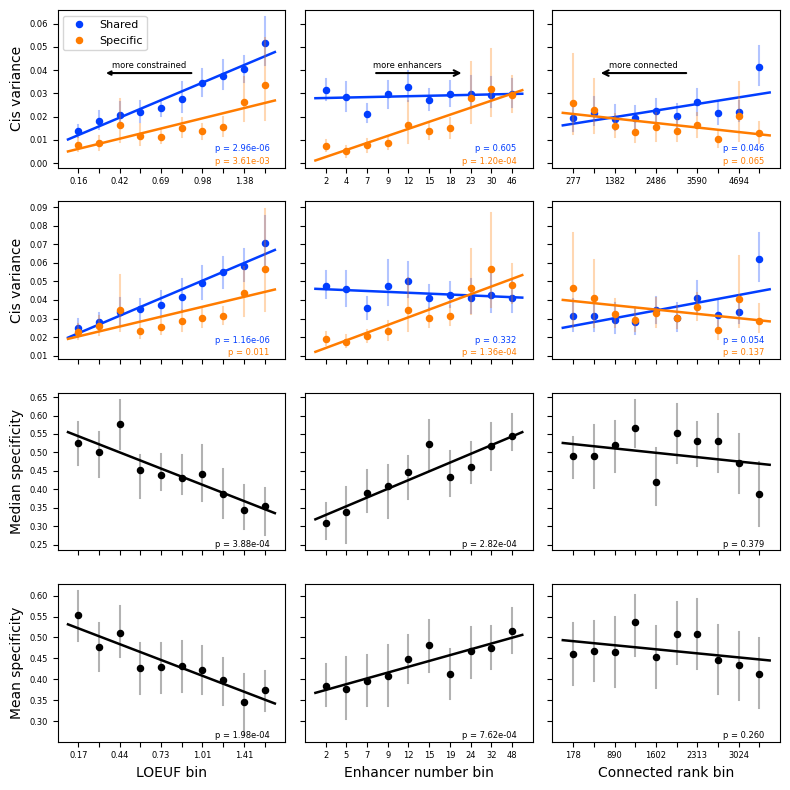

In [9]:
# par
fs = 8
lw = 1.8
s = 4
alpha = 0.3
format_p = lambda p: f'{p:.2e}' if p < 0.01 else f'{p:.3f}'

data = gf.copy()
data2 = gf.copy()
data = data.loc[data['g'] > 0]  # remove negative genes
data = data.loc[data['std_specificity'] < 100]  # remove outlier genes
# rerank connectness
data['combined_connected_rank'] = data['combined_connected_rank'].rank(method='first')
data2['combined_connected_rank'] = data2['combined_connected_rank'].rank(method='first')

annotations = ['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']
print(data2[annotations].dropna(how='all').shape, (~data2['LOEUF'].isna()).sum(), (~data2['ActivityLinking_EnhancerNumber'].isna()).sum(), (~data2['combined_connected_rank'].isna()).sum())
print(data[annotations].dropna(how='all').shape, (~data['LOEUF'].isna()).sum(), (~data['ActivityLinking_EnhancerNumber'].isna()).sum(), (~data['combined_connected_rank'].isna()).sum())

# divide gene annotation into bins
for annotation in annotations:
    data = plot.bin_gene_annotation(data, annotation, 10)
    data2 = plot.bin_gene_annotation(data2, annotation, 10)

# plot
colors = sns.color_palette('bright')
fig, axes = plt.subplots(nrows=4, ncols=len(annotations), figsize=(8, 8), sharey='row')

for j, annotation in enumerate(annotations):
    grouped = data.groupby(annotation + '_bin', observed=True)
    grouped2 = data2.groupby(annotation + '_bin', observed=True)

    # all genes
    line1, p1, slope1, intercept1 = plot.meta_regression(grouped2, 'hom_g2', 'mean', return_params=True)
    line2, p2, slope2, intercept2 = plot.meta_regression(grouped2, 'V', 'mean', return_params=True)

    ax = axes[0, j]
    
    sns.pointplot(data=data2, x=annotation + '_bin', y='hom_g2', estimator='mean',
                markers='.', linestyles='none', color=colors[0], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Shared', ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope1 * xs + intercept1, color=colors[0], lw=lw, linestyle='-')
    sns.pointplot(data=data2, x=annotation + '_bin', y='V', estimator='mean',
                markers='.', linestyles='none', color=colors[1], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Specific', ax=ax)
    ax.plot(xs, slope2 * xs + intercept2, color=colors[1], lw=lw, linestyle='-')

    ax.set_ylabel('Cis variance')
    ax.set_xlabel('')

    # add p values
    y = 0.01
    ax.text(0.93, y, f'p = {format_p(p2)}', fontsize=fs-2, color=colors[1], ha='right', va='bottom', transform=ax.transAxes)
    y += .08
    ax.text(0.93, y, f'p = {format_p(p1)}', fontsize=fs-2, color=colors[0], ha='right', va='bottom', transform=ax.transAxes)


    # filtered genes
    line1, p1, slope1, intercept1 = plot.meta_regression(grouped, 'hom_g2', 'mean', return_params=True)
    line2, p2, slope2, intercept2 = plot.meta_regression(grouped, 'V', 'mean', return_params=True)

    ax = axes[1, j]

    sns.pointplot(data=data, x=annotation + '_bin', y='hom_g2', estimator='mean',
                markers='.', linestyles='none', color=colors[0], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Shared', ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope1 * xs + intercept1, color=colors[0], lw=lw, linestyle='-')
    sns.pointplot(data=data, x=annotation + '_bin', y='V', estimator='mean',
                markers='.', linestyles='none', color=colors[1], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Specific', ax=ax)
    ax.plot(xs, slope2 * xs + intercept2, color=colors[1], lw=lw, linestyle='-')

    ax.set_ylabel('Cis variance')
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelbottom=False)

    # add p values
    y = 0.01
    ax.text(0.93, y, f'p = {format_p(p2)}', fontsize=fs-2, color=colors[1], ha='right', va='bottom', transform=ax.transAxes)
    y += .08
    ax.text(0.93, y, f'p = {format_p(p1)}', fontsize=fs-2, color=colors[0], ha='right', va='bottom', transform=ax.transAxes)


    ax = axes[2, j]
    line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'median', return_params=True)

    sns.pointplot(data=data, x=annotation + '_bin', y='specificity', estimator='median',
                markers='.', linestyles='none', color='k', err_kws={'alpha': alpha, 'linewidth': 1.5}, ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope * xs + intercept, color='k', lw=lw, linestyle='-')

    ax.set_ylabel('Median specificity')

    ax.text(0.93, .01, f'p = {format_p(p)}', fontsize=fs-2, color='k', ha='right', va='bottom', transform=ax.transAxes)
    ax.tick_params(axis='x', labelbottom=False)
    ax.set_xlabel('')


    ax = axes[3, j]
    line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'mean', return_params=True)

    sns.pointplot(data=data, x=annotation + '_bin', y='specificity', estimator='mean',
                markers='.', linestyles='none', color='k', err_kws={'alpha': alpha, 'linewidth': 1.5}, ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope * xs + intercept, color='k', lw=lw, linestyle='-')

    ax.set_ylabel('Mean specificity')

    ax.text(0.93, .01, f'p = {format_p(p)}', fontsize=fs-2, color='k', ha='right', va='bottom', transform=ax.transAxes)

    # set x label
    xlabel = re.sub('_', ' ', annotation + '_bin')
    if annotation == 'ActivityLinking_EnhancerNumber':
        xlabel = 'Enhancer number bin'
    elif annotation == 'combined_connected_rank':
        xlabel = 'Connected rank bin'
    ax.set_xlabel(xlabel)

    # set x tick labels
    if annotation in ['LOEUF', 'combined_connected_rank']:
        for ax in [axes[0, j], axes[3, j]]:
            xticklabels = []
            for i, label in enumerate(ax.get_xticklabels()):
                if i % 2 == 0:
                    xticklabels.append(label.get_text())
                else:
                    xticklabels.append('')
            ax.set_xticks(ax.get_xticks())
            ax.set_xticklabels(xticklabels)


# legend
for i, ax in enumerate(axes.flatten()):
    if i == 0:
        ax.legend(loc='upper left', fontsize=fs)
    else:
        ax.legend().set_visible(False)
    ax.tick_params(axis='both', labelsize=fs-2)


# add arrow
x, y = 0.6, 0.6
arrow_position = (x, y)
length = 0.4
axes[0, 0].annotate('', xy=(arrow_position[0] - length, arrow_position[1]), xytext=arrow_position,
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=fs-2, ha='center', va='center', xycoords=axes[0, 0].transAxes)
axes[0, 0].text(0.4, 0.62, 'more constrained', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 0].transAxes)

axes[0, 1].annotate('', xy=(arrow_position[0] + 0.1, arrow_position[1]), xytext=(arrow_position[0] - length + 0.1, arrow_position[1]),
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=10, ha='center', va='center', xycoords=axes[0, 1].transAxes)
axes[0, 1].text(0.45, 0.62, 'more enhancers', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 1].transAxes)

if 'combined_connected_rank' in annotations:
    axes[0, 2].annotate('', xy=(arrow_position[0] - length, arrow_position[1]), xytext=arrow_position,
            arrowprops=dict(arrowstyle='->', lw=1.5),
            fontsize=10, ha='center', va='center', xycoords=axes[0, 2].transAxes)
    axes[0, 2].text(0.4, 0.62, 'more connected', ha='center', va='bottom', 
                    fontsize=fs-2, transform=axes[0, 2].transAxes)

fig.tight_layout()

# LDSC replication

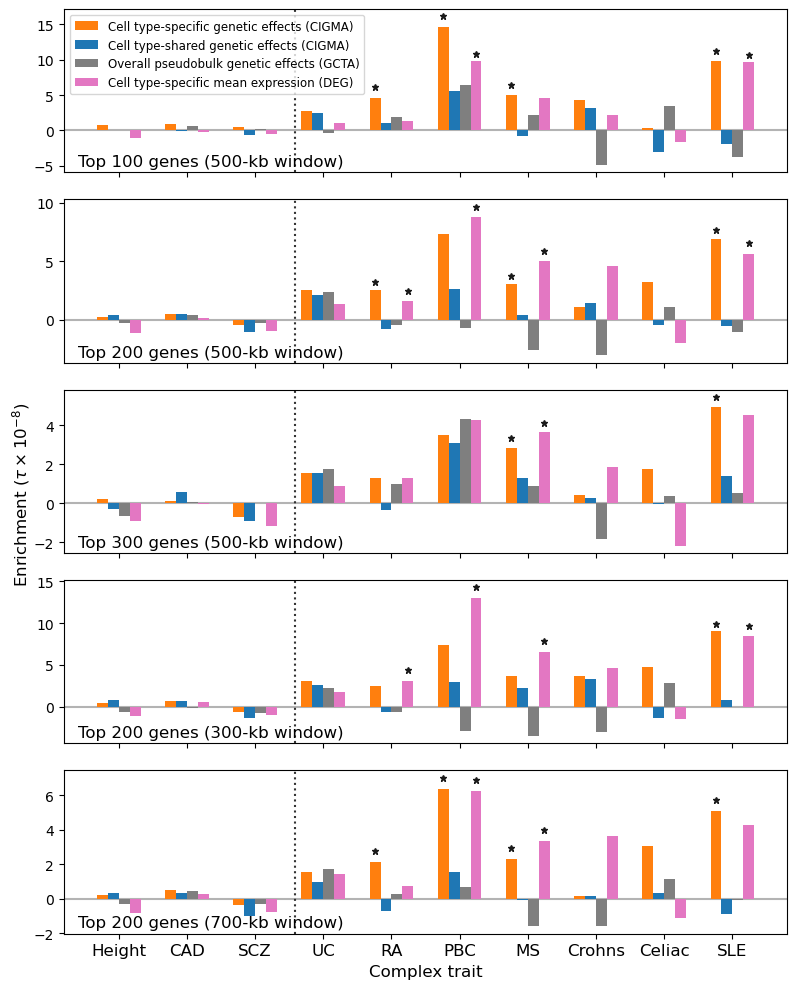

In [10]:
# LDSC
fs = 12
## data
neg_traits = ['Height', 'CAD', 'SCZ']
pos_traits = ['UC', 'RA', 'PBC', 'MS', 'Crohns', 'Celiac', 'Lupus']
traits = neg_traits + pos_traits

ldscs_window300k = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_200/window_300000/he.{gwas}.cell_type_results.txt'
                    for gwas in traits] 

ldscs_window700k = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_200/window_700000/he.{gwas}.cell_type_results.txt'
                    for gwas in traits] 

ldscs_top100 = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_100/window_500000/he.{gwas}.cell_type_results.txt'
                    for gwas in traits] 

ldscs_top200 = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_200/window_500000/he.{gwas}.cell_type_results.txt'
                    for gwas in traits] 

ldscs_top300 = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_300/window_500000/he.{gwas}.cell_type_results.txt'
                    for gwas in traits] 

# ldscs_top0 = [f'../../results/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/ldsc/top_0/window_500000/he.{gwas}.cell_type_results.txt'
#                     for gwas in traits] 


analyses = ['Top 100 genes (500-kb window)', 'Top 200 genes (500-kb window)', 'Top 300 genes (500-kb window)', 'Top 200 genes (300-kb window)', 'Top 200 genes (700-kb window)']
results = [ldscs_top100, ldscs_top200, ldscs_top300, ldscs_window300k, ldscs_window700k]
ldsc_rep_data = []
for analysis, ldsc_f in zip(analyses, results):
    for f, trait in zip(ldsc_f, traits):
        tmp = pd.read_table(f)
        if trait == 'Lupus':
            trait = 'SLE'
        tmp['trait'] = trait
        tmp['analysis'] = analysis
        ldsc_rep_data.append(tmp)

ldsc_rep_data = pd.concat(ldsc_rep_data, ignore_index=True)
# print(ldsc_rep_data.loc[ldsc_rep_data['analysis'] == 'Top 200 genes (300-kb window)'])
# update Lupus to SLE
index = traits.index('Lupus')
traits[index] = 'SLE'


# plot
gene_set_order = ['var', 'shared', 'gcta', 'mean' ]
fig, axes = plt.subplots(5, 1, figsize=(8, 10), sharex=True, sharey=False)
# fig, axes = plt.subplots(5, 1, figsize=(8, 10), sharex=True, sharey=True)

x = np.arange(ldsc_data['trait'].nunique())
width = 0.16
colors = [sns.color_palette()[1], sns.color_palette()[0], sns.color_palette()[7], sns.color_palette()[6]]

for ax, analysis in zip(axes, analyses):
    multiplier = -len(gene_set_order) / 2 + 0.5
    tmp_data = ldsc_rep_data.loc[ldsc_rep_data['analysis'] == analysis]
    for i, gene_set in enumerate(gene_set_order):
        if gene_set == 'mean':
            label = 'Cell type-specific mean expression (DEG)'
        elif gene_set == 'var':
            label = 'Cell type-specific genetic effects (CIGMA)'
        elif gene_set =='shared':
            label = 'Cell type-shared genetic effects (CIGMA)'
        elif gene_set == 'gcta':
            label = 'Overall pseudobulk genetic effects (GCTA)'
        offset = width * multiplier
        set_data = tmp_data.loc[tmp_data['Name'] == gene_set]
        set_data = set_data.set_index('trait')
        # ys = np.log10(set_data['Coefficient_P_value'][traits]) * (-1)
        ys = set_data['Coefficient'][traits] * 1e8
        rects = ax.bar(x + offset, ys, width, yerr=None, label=label, color=colors[i])

        # add star
        for p, rect in zip(set_data['Coefficient_P_value'][traits], rects):
            if p < 0.05:
                ax.plot(rect.get_x() + rect.get_width() / 2, rect.get_height() + ys.max() * .1, '*', 
                        color='0.1', markersize=5)

        multiplier += 1
    ax.text(0.02, 0.02, analysis, ha='left', va='bottom', fontsize=fs, transform=ax.transAxes)
    # ax.text(0.99, 0.95, analysis, ha='right', va='top', fontsize=fs, transform=ax.transAxes)

axes[0].set_ylabel(' ')
# fig.text(0.01, 0.5, '$-log_{10}(p)$ for the enrichment of disease heritability', fontsize=fs, va='center', ha='left', rotation='vertical')
fig.text(0.01, 0.5, r'Enrichment ($\tau \times 10^{-8}$)', fontsize=fs, va='center', ha='left', rotation='vertical')
axes[-1].set_xlabel('Complex trait', fontsize=fs)


axes[0].legend(loc='upper left', fontsize=fs-3.5)
axes[-1].set_xticks(x, traits, fontsize=fs)
for ax in axes:
    ax.axvline(len(neg_traits) - 0.5 + width / 2, linestyle=':', color='0.2')
    # ax.axhline(-np.log10(0.05), linestyle=(0, (6, 6)), color='0.7', zorder=0)
    ax.axhline(0, linestyle='-', color='0.7', zorder=0)

fig.tight_layout()